## Cleaning the cirrhosis dataset:

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load original dataset
df = pd.read_csv(r"C:\Users\lisal\Downloads\cirrhosis+patient+survival+prediction+dataset-1 (1)\cirrhosis.csv")

# Step 1: Clean the data
df_cleaned = df.copy()

# Remove columns with >25% missing values
missing_threshold = 0.25
missing_percentage = df_cleaned.isnull().mean()
cols_to_drop = missing_percentage[missing_percentage > missing_threshold].index
df_cleaned.drop(columns=cols_to_drop, inplace=True)

# Drop rows with critical missing values
df_cleaned.dropna(subset=['Status', 'Stage', 'Prothrombin', 'Platelets'], inplace=True)

# Encode categorical columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    label_encoders[col] = le

# Fill remaining missing numerical values with median
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Clip outliers
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col in ['ID', 'Status']:
        continue
    lower = df_cleaned[col].quantile(0.01)
    upper = df_cleaned[col].quantile(0.99)
    df_cleaned[col] = np.clip(df_cleaned[col], lower, upper)

# Save cleaned numeric version (optional if you still want this)
df_cleaned.to_csv("cleaned_cirrhosis_dataset.csv", index=False)

# Step 2: Make it readable for Excel
status_map = {0: "C", 1: "CL", 2: "D"}
sex_map = {0: "F", 1: "M"}
edema_map = {0: "No", 1: "Slight", 2: "Yes"}
stage_map = {1.0: "Stage 1", 2.0: "Stage 2", 3.0: "Stage 3", 4.0: "Stage 4"}

df_cleaned["Status"] = df_cleaned["Status"].map(status_map)
df_cleaned["Sex"] = df_cleaned["Sex"].map(sex_map)
df_cleaned["Edema"] = df_cleaned["Edema"].map(edema_map)
df_cleaned["Stage"] = df_cleaned["Stage"].map(stage_map)

# Save as readable Excel-compatible file
df_cleaned.to_csv("readable_cirrhosis_dataset1.csv", index=False, sep=';')

print("✅ Cleaned and readable dataset saved.")


✅ Cleaned and readable dataset saved.


In [35]:
import pandas as pd
df = pd.read_csv("readable_cirrhosis_dataset1.csv", sep=";")
print(df.columns)


Index(['ID', 'N_Days', 'Status', 'Age', 'Sex', 'Edema', 'Bilirubin', 'Albumin',
       'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')


## Part I :

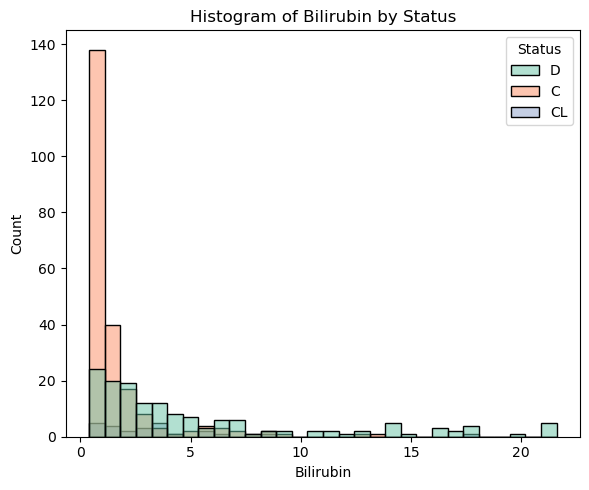

### 🔹 Histogram – Bilirubin by Status
- Bilirubin is a liver biomarker; high values suggest liver failure.
- Class D (Deceased) shows high and right-skewed bilirubin values.
- Classes C and CL cluster below 3 mg/dL.
- ✅ Bilirubin is highly informative for survival prediction.



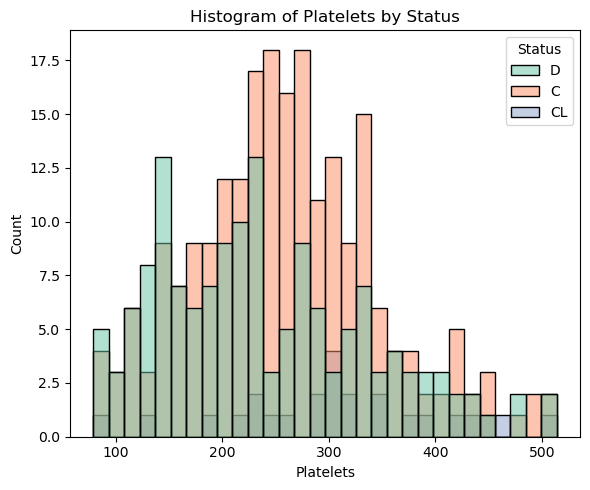

### 🔹 Histogram – Platelets by Status
- Platelets help with clotting; low levels indicate liver issues.
- Class C patients tend to have higher platelets (>250).
- Class D shows more values around 150–200.
- ✅ Platelets provide moderate class separation.



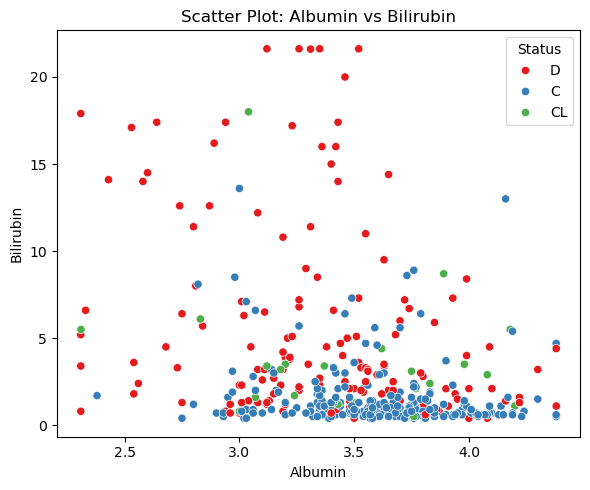

### 🔹 Scatter Plot – Albumin vs Bilirubin
- Albumin is a protein made by the liver. Low albumin + high bilirubin = high risk.
- Class D clusters in that risky region, while C stays in the safer zone.
- ✅ Excellent plot for class separation.



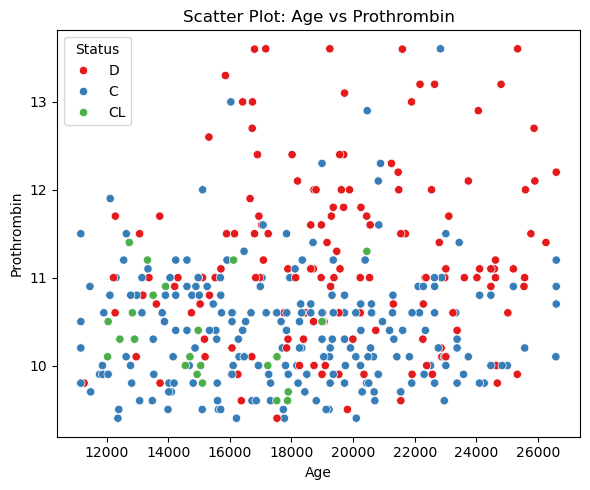

### 🔹 Scatter Plot – Age vs Prothrombin
- Prothrombin measures blood clotting. Higher values = liver deterioration.
- Class D shows wider spread toward high prothrombin.
- ⚠️ Not as clearly separable, but useful when combined in models.

### 📊 Statistical Summary

             count          mean          std         min        25%  \
Bilirubin    399.0      3.199679     4.270323      0.4000      0.800   
Albumin      399.0      3.496963     0.413267      2.3092      3.255   
Platelets    399.0    255.253133    94.641352     78.9400    188.500   
Prothrombin  399.0     10.703799     0.891215      9.4000     10.000   
Age          399.0  18469.006216  3782.054757  11164.8200  15582.500   

                  50%       75%         max  
Bilirubin        1.40      3.40     21.6180  
Albumin          3.52      3.77      4.3804  
Platelets      249.00    316.50    514.0600  
Prothrombin     10.60     11.10     13.6040  
Age          18628.00  21216.00  26592.8000  


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 – Read the CSV correctly
df = pd.read_csv("readable_cirrhosis_dataset1.csv", sep=";")

# Step 2 – Clean column names and drop missing rows
df.columns = df.columns.str.strip()
df.dropna(subset=["Status", "Bilirubin", "Platelets", "Albumin", "Prothrombin", "Age"], inplace=True)

# === HISTOGRAM 1: Bilirubin ===
plt.figure(figsize=(6, 5))
sns.histplot(data=df, x="Bilirubin", hue="Status", bins=30, palette="Set2")
plt.title("Histogram of Bilirubin by Status")
plt.xlabel("Bilirubin")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("### 🔹 Histogram – Bilirubin by Status")
print("- Bilirubin is a liver biomarker; high values suggest liver failure.")
print("- Class D (Deceased) shows high and right-skewed bilirubin values.")
print("- Classes C and CL cluster below 3 mg/dL.")
print("- ✅ Bilirubin is highly informative for survival prediction.\n")

# === HISTOGRAM 2: Platelets ===
plt.figure(figsize=(6, 5))
sns.histplot(data=df, x="Platelets", hue="Status", bins=30, palette="Set2")
plt.title("Histogram of Platelets by Status")
plt.xlabel("Platelets")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("### 🔹 Histogram – Platelets by Status")
print("- Platelets help with clotting; low levels indicate liver issues.")
print("- Class C patients tend to have higher platelets (>250).")
print("- Class D shows more values around 150–200.")
print("- ✅ Platelets provide moderate class separation.\n")

# === SCATTER 1: Albumin vs Bilirubin ===
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="Albumin", y="Bilirubin", hue="Status", palette="Set1")
plt.title("Scatter Plot: Albumin vs Bilirubin")
plt.xlabel("Albumin")
plt.ylabel("Bilirubin")
plt.tight_layout()
plt.show()

print("### 🔹 Scatter Plot – Albumin vs Bilirubin")
print("- Albumin is a protein made by the liver. Low albumin + high bilirubin = high risk.")
print("- Class D clusters in that risky region, while C stays in the safer zone.")
print("- ✅ Excellent plot for class separation.\n")

# === SCATTER 2: Age vs Prothrombin ===
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x="Age", y="Prothrombin", hue="Status", palette="Set1")
plt.title("Scatter Plot: Age vs Prothrombin")
plt.xlabel("Age")
plt.ylabel("Prothrombin")
plt.tight_layout()
plt.show()

print("### 🔹 Scatter Plot – Age vs Prothrombin")
print("- Prothrombin measures blood clotting. Higher values = liver deterioration.")
print("- Class D shows wider spread toward high prothrombin.")
print("- ⚠️ Not as clearly separable, but useful when combined in models.\n")

# === STATISTICAL SUMMARY ===
features = ["Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"]
summary = df[features].describe().T
print("### 📊 Statistical Summary\n")
print(summary)


## Part II :

### Hierarchical Clustering 

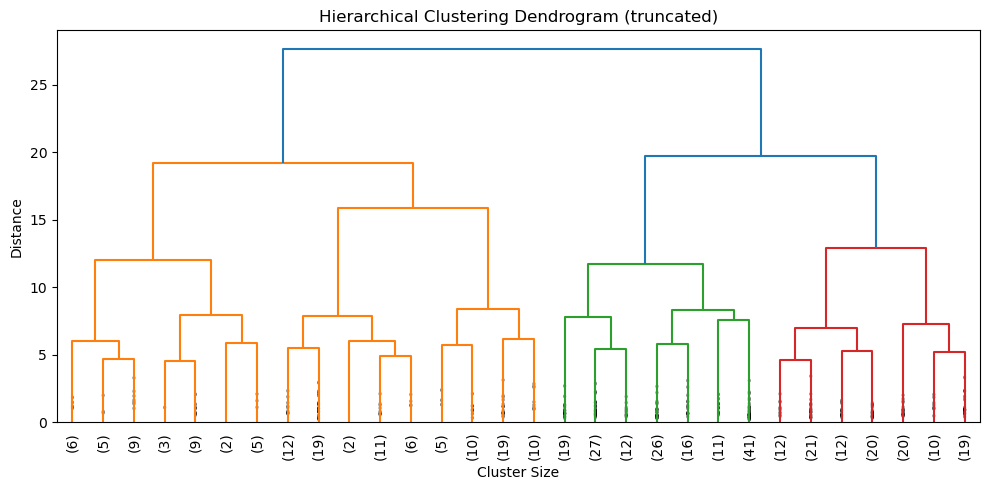

### 🧪 Hierarchical Clustering Results
    num_clusters  silhouette_score
5           26.0            0.1445
10           8.0            0.1398
15           5.0            0.1655


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Step 1 – Load and clean the dataset
df = pd.read_csv("readable_cirrhosis_dataset1.csv", sep=";")
df.columns = df.columns.str.strip()
df.dropna(subset=["Status", "Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"], inplace=True)

# Step 2 – Select relevant numeric features
features = ["Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"]
X = df[features]

# Step 3 – Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4 – Compute linkage matrix for hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Step 5 – Plot truncated dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., 
           leaf_font_size=10., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Step 6 – Try 3 cut-off distances and evaluate silhouette scores
cutoffs = [5, 10, 15]
cluster_results = {}

for cutoff in cutoffs:
    labels = fcluster(linkage_matrix, t=cutoff, criterion='distance')
    silhouette = silhouette_score(X_scaled, labels)
    cluster_results[cutoff] = {
        "num_clusters": len(set(labels)),
        "silhouette_score": round(silhouette, 4)
    }

# Step 7 – Display results
result_df = pd.DataFrame(cluster_results).T
print("### 🧪 Hierarchical Clustering Results")
print(result_df)


### K-Means Clustering & Silhouette Evaluation

C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

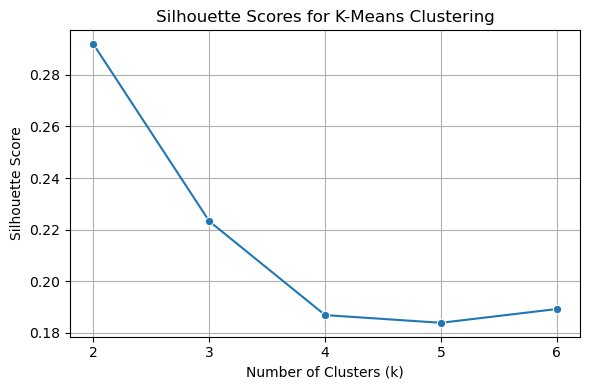

### 🔢 K-Means Clustering Results
   k  silhouette_score
0  2            0.2919
1  3            0.2232
2  4            0.1868
3  5            0.1838
4  6            0.1892


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1 – Load and prepare dataset
df = pd.read_csv("readable_cirrhosis_dataset1.csv", sep=";")
df.columns = df.columns.str.strip()
df.dropna(subset=["Status", "Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"], inplace=True)

# Step 2 – Feature selection and scaling
features = ["Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3 – K-Means: Try values of k from 2 to 6
k_values = range(2, 7)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Step 4 – Plot the silhouette scores
plt.figure(figsize=(6, 4))
sns.lineplot(x=list(k_values), y=silhouette_scores, marker="o")
plt.title("Silhouette Scores for K-Means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(list(k_values))
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5 – Print result table
kmeans_result = pd.DataFrame({
    "k": list(k_values),
    "silhouette_score": [round(s, 4) for s in silhouette_scores]
})
print("### 🔢 K-Means Clustering Results")
print(kmeans_result)


### Compare KMeans Clusters vs Real Labels

C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


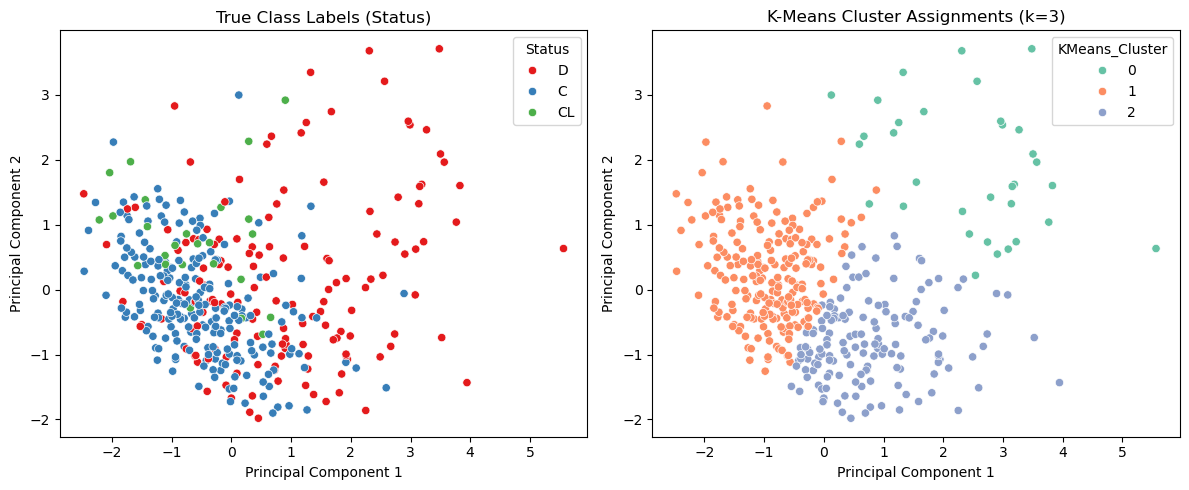

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1 – Load and clean the dataset
df = pd.read_csv("readable_cirrhosis_dataset1.csv", sep=";")
df.columns = df.columns.str.strip()
df.dropna(subset=["Status", "Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"], inplace=True)

# Step 2 – Feature selection and scaling
features = ["Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3 – Fit KMeans with k=3 (same as number of classes)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

# Step 4 – PCA projection for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

# Step 5 – Scatter plots: true labels vs KMeans clusters
plt.figure(figsize=(12, 5))

# Left: True class labels
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Status", palette="Set1")
plt.title("True Class Labels (Status)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Right: KMeans cluster assignments
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="PC1", y="PC2", hue="KMeans_Cluster", palette="Set2")
plt.title("K-Means Cluster Assignments (k=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


### Logistic Regression

Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           C       0.73      0.89      0.80        45
          CL       0.00      0.00      0.00         5
           D       0.72      0.60      0.65        30

    accuracy                           0.72        80
   macro avg       0.48      0.50      0.48        80
weighted avg       0.68      0.72      0.70        80


Confusion Matrix:
      C  CL   D
C   40   0   5
CL   3   0   2
D   12   0  18


C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


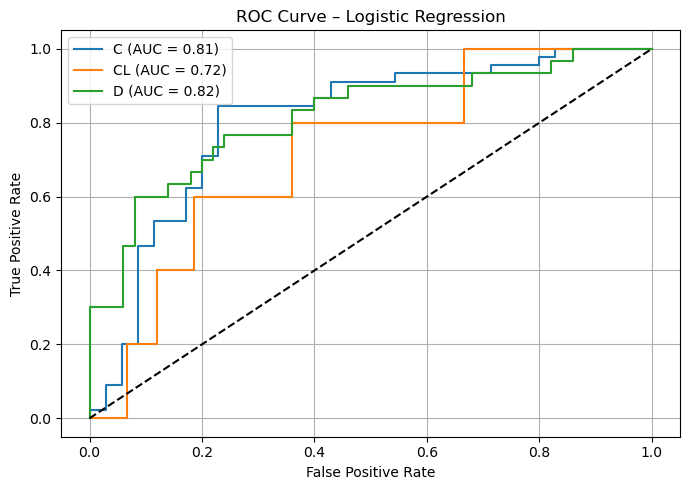

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Step 1 – Load dataset and clean
df = pd.read_csv("readable_cirrhosis_dataset1.csv", sep=";")
df.columns = df.columns.str.strip()
df.dropna(subset=["Status", "Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"], inplace=True)

# Step 2 – Encode target labels
label_encoder = LabelEncoder()
df["Status_encoded"] = label_encoder.fit_transform(df["Status"])

# Step 3 – Feature selection and scaling
features = ["Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"]
X = df[features]
y = df["Status_encoded"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4 – Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Step 5 – Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 6 – Predict and Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Accuracy and classification report
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}\n")

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)
print("\nConfusion Matrix:\n", conf_df)

# Step 7 – ROC Curves (one vs rest)
plt.figure(figsize=(7, 5))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Random Forest Classifier

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           C       0.79      0.84      0.82        45
          CL       1.00      0.20      0.33         5
           D       0.71      0.73      0.72        30

    accuracy                           0.76        80
   macro avg       0.83      0.59      0.62        80
weighted avg       0.77      0.76      0.75        80


Confusion Matrix:
      C  CL   D
C   38   0   7
CL   2   1   2
D    8   0  22


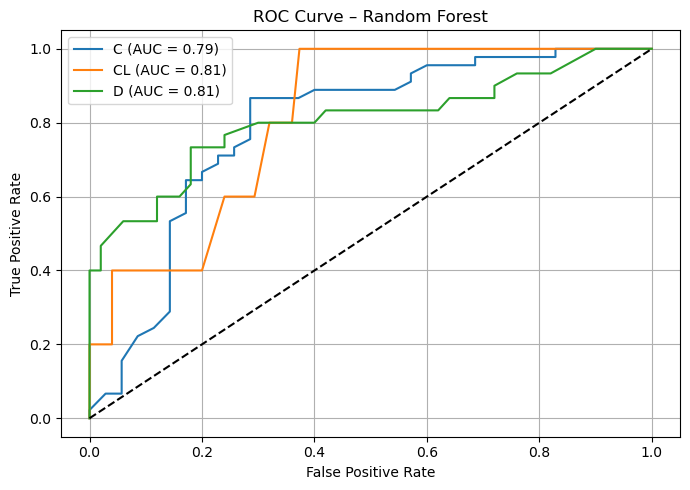

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume: X_train, X_test, y_train, y_test, label_encoder are already defined

# Step 1 – Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#exp 2 #rf_model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
#exp 3 #rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2 – Predictions
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)

# Step 3 – Evaluation
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {rf_acc:.2f}")

rf_report = classification_report(y_test, rf_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", rf_report)

rf_conf_matrix = confusion_matrix(y_test, rf_pred)
conf_df = pd.DataFrame(rf_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)
print("\nConfusion Matrix:\n", conf_df)

# Step 4 – ROC Curves
plt.figure(figsize=(7, 5))
for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, rf_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


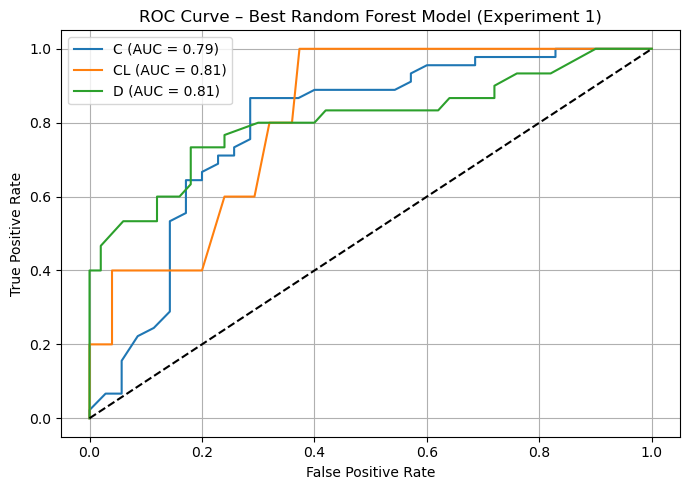

🔍 Random Forest – Experiment Comparison:

     Experiment  Accuracy  Precision_C  Recall_C  F1_C  Precision_D  Recall_D  \
0  Experiment 1    0.7625         0.79      0.84  0.82         0.71      0.73   
1  Experiment 2    0.7375         0.76      0.84  0.80         0.70      0.70   
2  Experiment 3    0.7625         0.79      0.84  0.82         0.71      0.73   

   F1_D  Precision_CL  Recall_CL  F1_CL  
0  0.72           1.0        0.2   0.33  
1  0.70           0.0        0.0   0.00  
2  0.72           1.0        0.2   0.33  


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load and prepare the dataset
df = pd.read_csv("readable_cirrhosis_dataset1.csv", sep=";")
df.columns = df.columns.str.strip()
df.dropna(subset=["Status", "Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"], inplace=True)

# Encode target variable
label_encoder = LabelEncoder()
df["Status_encoded"] = label_encoder.fit_transform(df["Status"])

# Select features and scale
features = ["Bilirubin", "Albumin", "Platelets", "Prothrombin", "Age"]
X = df[features]
y = df["Status_encoded"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Define configurations for 3 experiments
rf_configs = {
    "Experiment 1": RandomForestClassifier(n_estimators=100, random_state=42),
    "Experiment 2": RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42),
    "Experiment 3": RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42),
}

results = []

# Run each experiment and collect metrics
for label, model in rf_configs.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(
        y_test, y_pred, target_names=label_encoder.classes_, output_dict=True
    )
    results.append({
        "Experiment": label,
        "Accuracy": round(acc, 4),
        "Precision_C": round(report["C"]["precision"], 2),
        "Recall_C": round(report["C"]["recall"], 2),
        "F1_C": round(report["C"]["f1-score"], 2),
        "Precision_D": round(report["D"]["precision"], 2),
        "Recall_D": round(report["D"]["recall"], 2),
        "F1_D": round(report["D"]["f1-score"], 2),
        "Precision_CL": round(report["CL"]["precision"], 2) if "CL" in report else 0.0,
        "Recall_CL": round(report["CL"]["recall"], 2) if "CL" in report else 0.0,
        "F1_CL": round(report["CL"]["f1-score"], 2) if "CL" in report else 0.0,
    })

# Plot ROC curve for the best model (Experiment 1)
best_model = rf_configs["Experiment 1"]
best_model.fit(X_train, y_train)
y_proba = best_model.predict_proba(X_test)

plt.figure(figsize=(7, 5))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – Best Random Forest Model (Experiment 1)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display results as a DataFrame
comparison_df = pd.DataFrame(results)
print("🔍 Random Forest – Experiment Comparison:\n")
print(comparison_df)
